In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from sqlalchemy.dialects.mssql.information_schema import columns

## Import Data of 4 Fuel Types

In [3]:
biomass_path = r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Data\separate_samples\biomass.csv"
mix_path = r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Data\separate_samples\mix.csv"
plastic_path = r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Data\separate_samples\plastic.csv"
coal_path = r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Data\separate_samples\coal.csv"

In [4]:
biomass = pd.read_csv(biomass_path, delimiter=';').drop(columns=['Category'])
mix = pd.read_csv(mix_path).drop(columns=['Category'])
plastic = pd.read_csv(plastic_path, delimiter=';').drop(columns=['Category'])
coal = pd.read_csv(coal_path).drop(columns=['Category'])
overall = (pd.concat([pd.read_csv(biomass_path, delimiter=';'), pd.read_csv(mix_path), pd.read_csv(plastic_path, delimiter=';'), pd.read_csv(coal_path)], axis=0))


In [5]:
overall = overall.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
biomass.describe()

,temperature,residence_time,pressure,heat_rate,wc,vm,fc,ac,c,h,o,n,s,cl,hc,oc,lhv,devol_yield
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,801.229508,5.428279,2.620902,909.006148,6.930159,61.469248,14.533454,17.067139,41.784390,4.843405,27.689453,1.870075,0.629203,0.546982,1.397425,2.969685,16.481337,54.535612
std,204.308777,4.546791,4.173326,270.539321,2.558794,13.069084,7.564114,14.426074,7.773020,0.562962,10.984504,1.406342,0.845144,0.695472,0.286756,6.733762,3.349387,22.463934
min,200.000000,0.500000,0.500000,10.000000,3.200000,50.700000,3.064326,0.000000,32.400000,3.969000,17.110000,0.269662,0.046420,0.000000,0.461416,0.396065,13.528000,-2.871983
25%,600.000000,1.000000,1.000000,1000.000000,5.200000,53.240000,6.410000,0.600000,37.500000,4.600000,21.200000,0.300000,0.100000,0.000000,1.200000,0.400000,13.943000,41.746668
50%,800.000000,5.000000,1.000000,1000.000000,7.600000,53.700000,15.400000,14.965000,39.465361,4.800000,24.776000,1.375000,0.200000,0.056500,1.400000,0.400000,15.055000,54.296608
75%,1000.000000,10.000000,1.000000,1000.000000,8.005000,75.400000,16.400000,23.700000,50.400000,5.214476,35.300000,2.400000,0.369425,1.500000,1.500000,0.500000,19.843000,69.778742
max,1200.000000,20.000000,20.000000,1000.000000,10.200000,91.735674,35.249915,36.690000,58.400883,5.700000,54.936839,3.900000,2.100000,1.585535,1.703704,26.102250,27.129260,99.756944


In [7]:
mix.describe()

,temperature,residence_time,pressure,heat_rate,wc,vm,fc,ac,c,h,o,n,s,cl,hc,oc,lhv,devol_yield
count,563.000000,563.000000,563.000000,563.0,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,357.000000,563.000000,563.000000,357.000000,563.000000
mean,786.678508,4.730906,2.223801,1000.0,6.530908,64.786604,11.698825,16.983663,52.352610,7.748326,14.460864,1.698935,0.221617,0.002046,1.670509,0.264812,26.648355,48.722799
std,193.166574,4.057961,3.976757,0.0,1.221248,7.413420,3.028138,3.612703,6.283413,1.438288,2.765003,0.335908,0.093172,0.000898,0.095297,0.048113,3.867331,20.159258
min,400.000000,0.500000,1.000000,1000.0,4.896000,55.044221,7.392000,11.376000,43.776086,5.833557,10.124000,1.170720,0.129110,0.000920,1.552250,0.192000,22.243420,1.457726
25%,600.000000,1.000000,1.000000,1000.0,5.202000,59.668101,7.854000,12.087000,49.362000,6.933649,10.763000,1.241640,0.147570,0.001680,1.607864,0.204000,22.868500,32.327973
50%,800.000000,2.000000,1.000000,1000.0,5.758626,63.025000,11.550000,17.775000,50.205548,7.196250,15.210899,1.809000,0.173250,0.001820,1.625000,0.256047,23.239800,53.294036
75%,1000.000000,10.000000,1.000000,1000.0,7.650000,74.857000,15.075431,19.585459,60.749520,9.496650,15.875000,1.882534,0.290668,0.003220,1.745000,0.300000,30.682000,64.786425
max,1200.000000,10.000000,20.000000,1000.0,8.006120,76.336000,15.242776,21.706883,62.495360,10.132050,18.241598,2.149335,0.387737,0.003640,1.857000,0.328893,31.307080,84.896715


In [8]:
coal.describe()

,temperature,residence_time,pressure,heat_rate,wc,vm,fc,ac,c,h,o,n,s,cl,hc,oc,lhv,devol_yield
count,195.000000,195.000000,195.000000,195.000000,195.0,195.0,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,195.0,195.0,195.0,195.00,195.000000
mean,827.692308,6.130769,2.148718,858.102564,10.8,44.2,4.090000e+01,4.200000e+00,6.340000e+01,3.900000e+00,1.620000e+01,9.000000e-01,6.000000e-01,0.0,0.7,0.2,20.13,36.981368
std,163.253985,4.182940,3.898643,325.204123,0.0,0.0,7.123717e-15,8.904646e-16,1.424743e-14,8.904646e-16,3.561858e-15,2.226161e-16,1.113081e-16,0.0,0.0,0.0,0.00,19.572015
min,400.000000,0.500000,1.000000,10.000000,10.8,44.2,4.090000e+01,4.200000e+00,6.340000e+01,3.900000e+00,1.620000e+01,9.000000e-01,6.000000e-01,0.0,0.7,0.2,20.13,1.965318
25%,600.000000,1.000000,1.000000,1000.000000,10.8,44.2,4.090000e+01,4.200000e+00,6.340000e+01,3.900000e+00,1.620000e+01,9.000000e-01,6.000000e-01,0.0,0.7,0.2,20.13,19.849434
50%,800.000000,10.000000,1.000000,1000.000000,10.8,44.2,4.090000e+01,4.200000e+00,6.340000e+01,3.900000e+00,1.620000e+01,9.000000e-01,6.000000e-01,0.0,0.7,0.2,20.13,39.060972
75%,1000.000000,10.000000,1.000000,1000.000000,10.8,44.2,4.090000e+01,4.200000e+00,6.340000e+01,3.900000e+00,1.620000e+01,9.000000e-01,6.000000e-01,0.0,0.7,0.2,20.13,52.308590
max,1200.000000,10.000000,20.000000,1000.000000,10.8,44.2,4.090000e+01,4.200000e+00,6.340000e+01,3.900000e+00,1.620000e+01,9.000000e-01,6.000000e-01,0.0,0.7,0.2,20.13,82.190787


In [9]:
plastic.describe()

,temperature,residence_time,pressure,heat_rate,wc,vm,fc,ac,c,h,o,n,s,cl,hc,oc,lhv,devol_yield
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,838.632812,5.521484,2.757812,832.343750,2.787500,75.559375,12.009375,9.643750,70.067188,8.221875,10.073438,1.185937,1.160938,0.021875,1.379687,0.089063,31.670430,62.070410
std,186.957282,4.592890,3.759424,347.585474,0.322976,9.745285,8.385940,2.487735,7.903775,0.981630,2.975046,0.287718,0.710618,0.041421,0.203637,0.056338,4.256239,20.653119
min,400.000000,0.500000,0.500000,10.000000,2.600000,58.900000,7.000000,8.200000,54.000000,6.500000,7.000000,1.000000,0.700000,0.000000,1.000000,0.000000,20.299500,-20.537715
25%,600.000000,1.000000,1.000000,1000.000000,2.700000,68.700000,7.000000,8.200000,68.700000,7.000000,9.800000,1.000000,0.800000,0.000000,1.400000,0.100000,32.177000,54.740396
50%,800.000000,5.000000,1.000000,1000.000000,2.700000,82.100000,7.000000,8.200000,68.700000,8.900000,9.800000,1.000000,0.800000,0.000000,1.500000,0.100000,32.177000,68.522844
75%,1000.000000,10.000000,1.000000,1000.000000,2.700000,82.100000,11.600000,10.900000,68.700000,8.900000,9.800000,1.300000,0.800000,0.000000,1.500000,0.100000,32.177000,76.156414
max,1200.000000,20.000000,20.000000,1000.000000,3.700000,82.100000,27.600000,16.000000,82.300000,8.900000,17.900000,1.700000,2.500000,0.100000,1.500000,0.200000,35.800000,94.716775


In [10]:
print(f"Total Samples: {overall.shape[0]} | Devolatilization Mean: {overall['devol_yield'].mean()} | Standard Deviation: {overall['devol_yield'].std()}")
print(f"Biomass Samples: {biomass.shape[0]} | Devolatilization Mean: {biomass['devol_yield'].mean()} | Standard Deviation: {biomass['devol_yield'].std()}")
print(f"Mix Samples:\t {mix.shape[0]} | Devolatilization Mean: {mix['devol_yield'].mean()} | Standard Deviation: {mix['devol_yield'].std()}")
print(f"Plastic Samples: {plastic.shape[0]} | Devolatilization Mean: {plastic['devol_yield'].mean()} | Standard Deviation: {plastic['devol_yield'].std()}")
print(f"Coal Samples:\t {coal.shape[0]} | Devolatilization Mean: {coal['devol_yield'].mean()} | Standard Deviation: {coal['devol_yield'].std()}")

Total Samples: 1990 | Devolatilization Mean: 52.140243691445725 | Standard Deviation: 22.261758515118846
Biomass Samples: 976 | Devolatilization Mean: 54.53561209727152 | Standard Deviation: 22.46393446543245
Mix Samples:	 563 | Devolatilization Mean: 48.722798712637655 | Standard Deviation: 20.15925824387848
Plastic Samples: 256 | Devolatilization Mean: 62.07041035314062 | Standard Deviation: 20.65311852329229
Coal Samples:	 195 | Devolatilization Mean: 36.98136827395385 | Standard Deviation: 19.57201465626493


## Devolatilization & Temperature Distribution of Fuel Groups

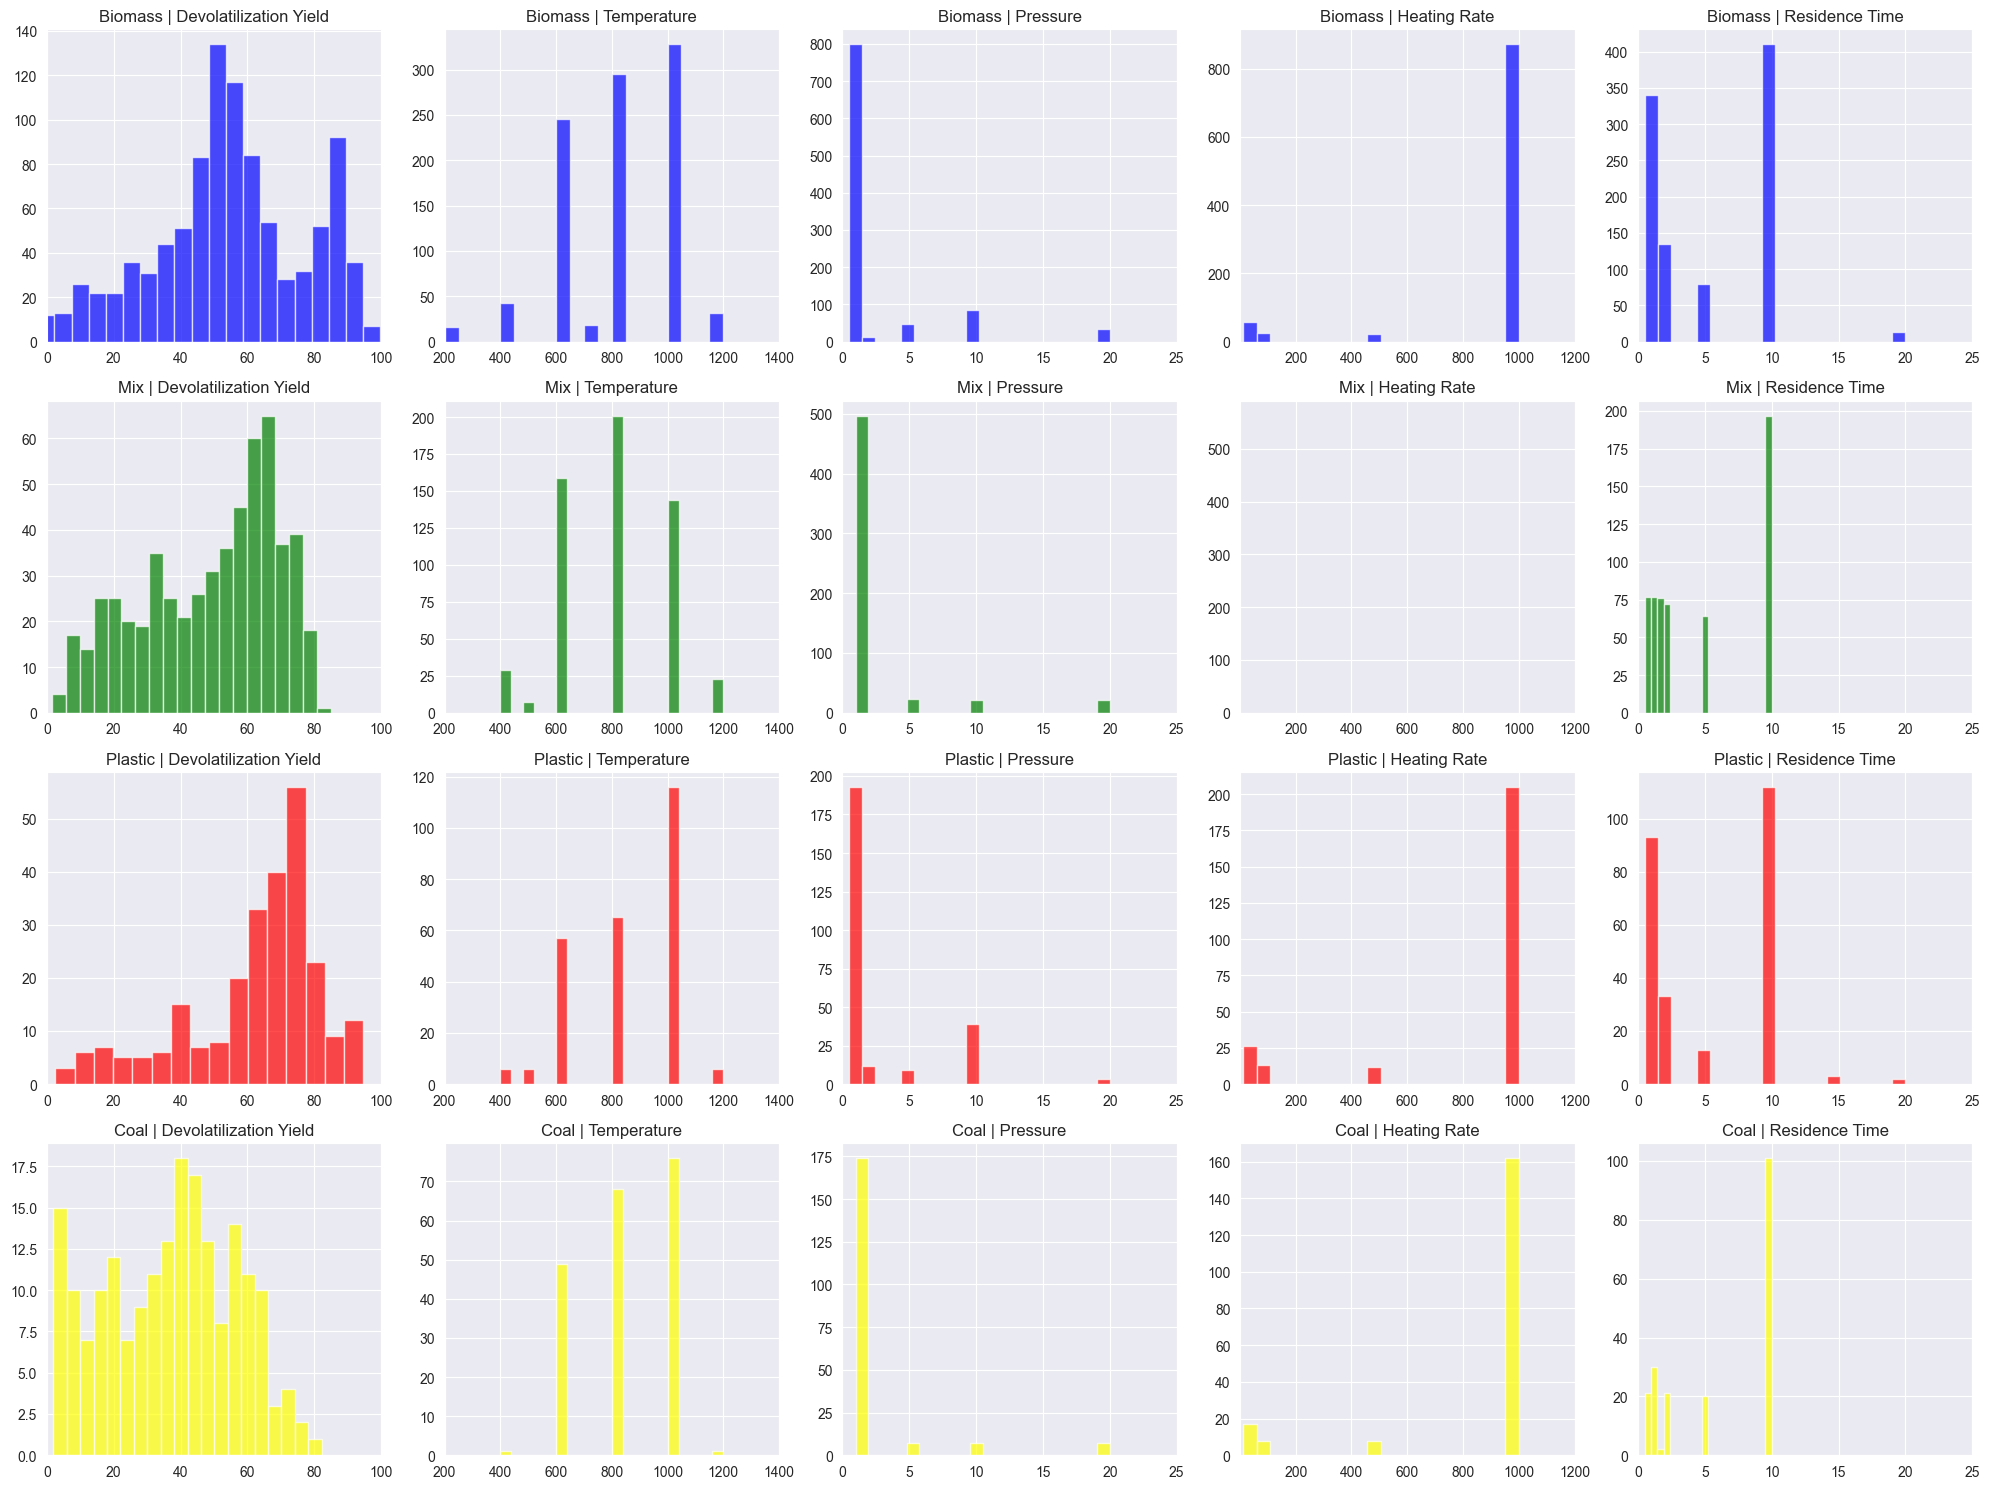

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 5, figsize=(20, 15))

# Biomass
axes[0, 0].hist(biomass['devol_yield'], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_title('Biomass | Devolatilization Yield')
axes[0, 0].set_xlim(0, 100)

axes[0, 1].hist(biomass['temperature'], bins=20, color='blue', alpha=0.7)
axes[0, 1].set_title('Biomass | Temperature')
axes[0, 1].set_xlim(200, 1400)

axes[0, 2].hist(biomass['pressure'], bins=20, color='blue', alpha=0.7)
axes[0, 2].set_title('Biomass | Pressure')
axes[0, 2].set_xlim(0, 25)

axes[0, 3].hist(biomass['heat_rate'], bins=20, color='blue', alpha=0.7)
axes[0, 3].set_title('Biomass | Heating Rate')
axes[0, 3].set_xlim(1, 1200)

axes[0, 4].hist(biomass['residence_time'], bins=20, color='blue', alpha=0.7)
axes[0, 4].set_title('Biomass | Residence Time')
axes[0, 4].set_xlim(0, 25)

# Mix
axes[1, 0].hist(mix['devol_yield'], bins=20, color='green', alpha=0.7)
axes[1, 0].set_title('Mix | Devolatilization Yield')
axes[1, 0].set_xlim(0, 100)

axes[1, 1].hist(mix['temperature'], bins=20, color='green', alpha=0.7)
axes[1, 1].set_title('Mix | Temperature')
axes[1, 1].set_xlim(200, 1400)

axes[1, 2].hist(mix['pressure'], bins=20, color='green', alpha=0.7)
axes[1, 2].set_title('Mix | Pressure')
axes[1, 2].set_xlim(0, 25)

axes[1, 3].hist(mix['heat_rate'], bins=20, color='green', alpha=0.7)
axes[1, 3].set_title('Mix | Heating Rate')
axes[1, 3].set_xlim(1, 1200)

axes[1, 4].hist(mix['residence_time'], bins=20, color='green', alpha=0.7)
axes[1, 4].set_title('Mix | Residence Time')
axes[1, 4].set_xlim(0, 25)

# Plastic
axes[2, 0].hist(plastic['devol_yield'], bins=20, color='red', alpha=0.7)
axes[2, 0].set_title('Plastic | Devolatilization Yield')
axes[2, 0].set_xlim(0, 100)

axes[2, 1].hist(plastic['temperature'], bins=20, color='red', alpha=0.7)
axes[2, 1].set_title('Plastic | Temperature')
axes[2, 1].set_xlim(200, 1400)

axes[2, 2].hist(plastic['pressure'], bins=20, color='red', alpha=0.7)
axes[2, 2].set_title('Plastic | Pressure')
axes[2, 2].set_xlim(0, 25)

axes[2, 3].hist(plastic['heat_rate'], bins=20, color='red', alpha=0.7)
axes[2, 3].set_title('Plastic | Heating Rate')
axes[2, 3].set_xlim(1, 1200)

axes[2, 4].hist(plastic['residence_time'], bins=20, color='red', alpha=0.7)
axes[2, 4].set_title('Plastic | Residence Time')
axes[2, 4].set_xlim(0,25)

# Coal
axes[3, 0].hist(coal['devol_yield'], bins=20, color='yellow', alpha=0.7)
axes[3, 0].set_title('Coal | Devolatilization Yield')
axes[3, 0].set_xlim(0, 100)

axes[3, 1].hist(coal['temperature'], bins=20, color='yellow', alpha=0.7)
axes[3, 1].set_title('Coal | Temperature')
axes[3, 1].set_xlim(200, 1400)

axes[3, 2].hist(coal['pressure'], bins=20, color='yellow', alpha=0.7)
axes[3, 2].set_title('Coal | Pressure')
axes[3, 2].set_xlim(0, 25)

axes[3, 3].hist(coal['heat_rate'], bins=20, color='yellow', alpha=0.7)
axes[3, 3].set_title('Coal | Heating Rate')
axes[3, 3].set_xlim(1, 1200)

axes[3, 4].hist(coal['residence_time'], bins=20, color='yellow', alpha=0.7)
axes[3, 4].set_title('Coal | Residence Time')
axes[3, 4].set_xlim(0,25)

plt.tight_layout()
plt.show()


## Box Plot of Fuel Groups

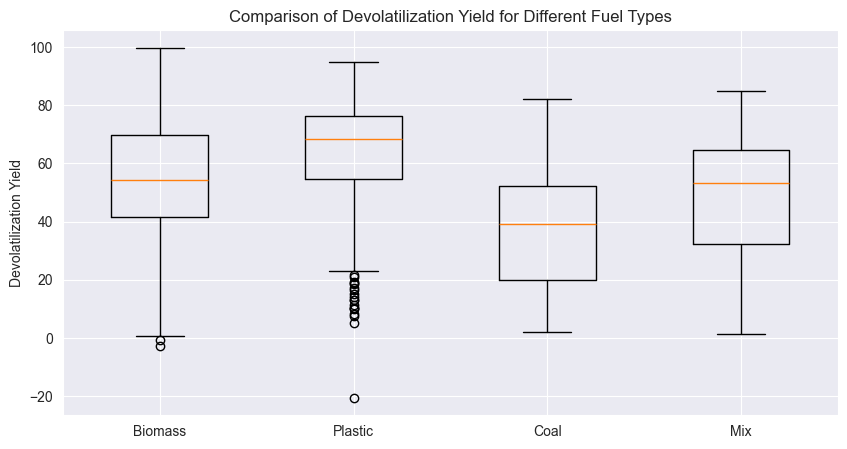

In [12]:
plt.figure(figsize=(10, 5))

# Create a box plot with positions to avoid overlap
plt.boxplot([biomass['devol_yield'], plastic['devol_yield'], coal['devol_yield'], mix['devol_yield']],
            positions=[1, 2, 3, 4], widths=0.5)

plt.xticks([1, 2, 3, 4], ['Biomass', 'Plastic', 'Coal', 'Mix'])
plt.ylabel('Devolatilization Yield')
plt.title('Comparison of Devolatilization Yield for Different Fuel Types')

plt.grid(True)
plt.show()

## Kolmogorov-Smirnov Test (KS Test)

To compare temperature distribution of different fuel groups

In [13]:
ks_stat_biomass_mix, p_value_biomass_mix = ks_2samp(biomass['temperature'], mix['temperature'])
print(f"KS Test Biomass vs Mix: Statistic={ks_stat_biomass_mix}, p-value={p_value_biomass_mix}")

ks_stat_biomass_plastic, p_value_biomass_plastic = ks_2samp(biomass['temperature'], plastic['temperature'])
print(f"KS Test Biomass vs Plastic: Statistic={ks_stat_biomass_plastic}, p-value={p_value_biomass_plastic}")

ks_stat_mix_plastic, p_value_mix_plastic = ks_2samp(mix['temperature'], plastic['temperature'])
print(f"KS Test Mix vs Plastic: Statistic={ks_stat_mix_plastic}, p-value={p_value_mix_plastic}")

ks_stat_coal_plastic, p_value_coal_plastic = ks_2samp(coal['temperature'], plastic['temperature'])
print(f"KS Test Coal vs Plastic: Statistic={ks_stat_coal_plastic}, p-value={p_value_coal_plastic}")

ks_stat_coal_biomass, p_value_coal_biomass = ks_2samp(biomass['temperature'], coal['temperature'])
print(f"KS Test Coal vs Biomass: Statistic={ks_stat_coal_biomass}, p-value={p_value_coal_biomass}")

ks_stat_coal_mix, p_value_coal_mix = ks_2samp(mix['temperature'], coal['temperature'])
print(f"KS Test Coal vs Mix: Statistic={ks_stat_coal_mix}, p-value={p_value_coal_mix}")

KS Test Biomass vs Mix: Statistic=0.07222723699152665, p-value=0.045310453646702116
KS Test Biomass vs Plastic: Statistic=0.10771004098360656, p-value=0.01657842371037278
KS Test Mix vs Plastic: Statistic=0.1799372779751332, p-value=1.8183884459811202e-05
KS Test Coal vs Plastic: Statistic=0.08169070512820513, p-value=0.4217956227708767
KS Test Coal vs Biomass: Statistic=0.07248318621269441, p-value=0.339697605793158
KS Test Coal vs Mix: Statistic=0.09824657284692809, p-value=0.11268041166752746


To compare devolatilization yield distribution of different fuel groups

In [14]:
ks_stat_biomass_mix, p_value_biomass_mix = ks_2samp(biomass['devol_yield'], mix['devol_yield'])
print(f"KS Test Biomass vs Mix: Statistic={ks_stat_biomass_mix}, p-value={p_value_biomass_mix}")

ks_stat_biomass_plastic, p_value_biomass_plastic = ks_2samp(biomass['devol_yield'], plastic['devol_yield'])
print(f"KS Test Biomass vs Plastic: Statistic={ks_stat_biomass_plastic}, p-value={p_value_biomass_plastic}")

ks_stat_mix_plastic, p_value_mix_plastic = ks_2samp(mix['devol_yield'], plastic['devol_yield'])
print(f"KS Test Mix vs Plastic: Statistic={ks_stat_mix_plastic}, p-value={p_value_mix_plastic}")

ks_stat_coal_plastic, p_value_coal_plastic = ks_2samp(coal['devol_yield'], plastic['devol_yield'])
print(f"KS Test Coal vs Plastic: Statistic={ks_stat_coal_plastic}, p-value={p_value_coal_plastic}")

ks_stat_coal_biomass, p_value_coal_biomass = ks_2samp(biomass['devol_yield'], coal['devol_yield'])
print(f"KS Test Coal vs Biomass: Statistic={ks_stat_coal_biomass}, p-value={p_value_coal_biomass}")

ks_stat_coal_mix, p_value_coal_mix = ks_2samp(mix['devol_yield'], coal['devol_yield'])
print(f"KS Test Coal vs Mix: Statistic={ks_stat_coal_mix}, p-value={p_value_coal_mix}")

KS Test Biomass vs Mix: Statistic=0.18804596278717642, p-value=1.611385192743388e-11
KS Test Biomass vs Plastic: Statistic=0.31410092213114754, p-value=3.186468673483304e-18
KS Test Mix vs Plastic: Statistic=0.3458314831261101, p-value=3.188714125342598e-19
KS Test Coal vs Plastic: Statistic=0.5702724358974359, p-value=8.090198897535063e-34
KS Test Coal vs Biomass: Statistic=0.36340899537620847, p-value=1.21517901087672e-19
KS Test Coal vs Mix: Statistic=0.29770915881040216, p-value=7.55170878214843e-12


# Kolmogorov - Smirnov Test to show Fuel Characteristics Effect
Used to compare the temperature distributions between different 2 fuel groups.
- If the p-value is low (e.g., <0.05), the temperature distributions are significantly different.
- If the p-value is high, there is no significant difference in the distributions.

To exclude kinetic effect, fuels has been compared at the same conditions to observe the variation of their devolatilization yield

Where:
- Heat Rate = 1000 K/s
- Temperature = 1000 C
- Pressure = 1 bar
- Residence Time = 10 sec

## What has been proven?
- Fuel types behave differently even though they undergo pyrolysis in the same thermodynamic conditions
- Mix & Plastic, Biomass & Plastic has similar devolatilization yield distributions


In [15]:
filtered_biomass = biomass['devol_yield'].loc[(biomass['temperature'] == 1000) & (biomass['heat_rate'] == 1000) & (biomass['pressure'] == 1) & (biomass['residence_time'] == 10)]
filtered_mix = mix['devol_yield'].loc[(mix['temperature'] == 1000) & (mix['heat_rate'] == 1000) & (mix['pressure'] == 1) & (mix['residence_time'] == 10)]
filtered_coal = coal['devol_yield'].loc[(coal['temperature'] == 1000) & (coal['heat_rate'] == 1000) & (coal['pressure'] == 1) & (coal['residence_time'] == 10)]
filtered_plastic = plastic['devol_yield'].loc[(plastic['temperature'] == 1000) & (plastic['heat_rate'] == 1000) & (plastic['pressure'] == 1) & (plastic['residence_time'] == 10)]

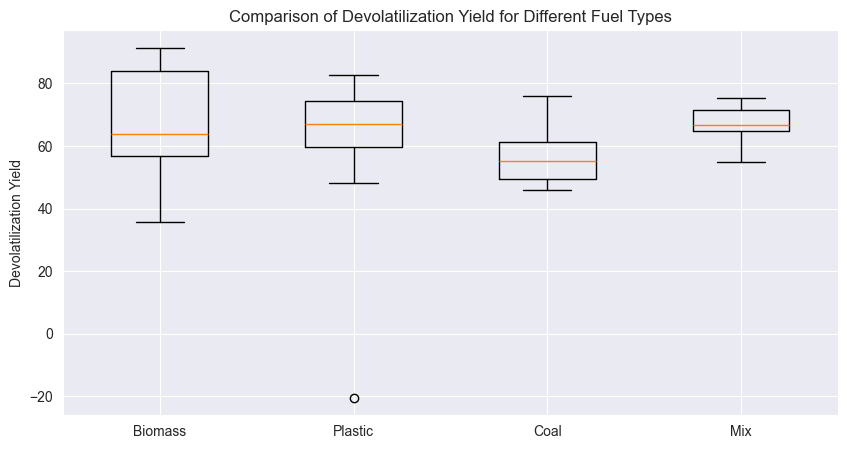

In [16]:
plt.figure(figsize=(10, 5))

# Create a box plot with positions to avoid overlap
plt.boxplot([filtered_biomass, filtered_plastic, filtered_coal, filtered_mix],
            positions=[1, 2, 3, 4], widths=0.5)

plt.xticks([1, 2, 3, 4], ['Biomass', 'Plastic', 'Coal', 'Mix'])
plt.ylabel('Devolatilization Yield')
plt.title('Comparison of Devolatilization Yield for Different Fuel Types')

plt.grid(True)
plt.show()

In [17]:
ks_stat_biomass_mix, p_value_biomass_mix = ks_2samp(filtered_biomass, filtered_mix)
print(f"KS Test Biomass vs Mix: Statistic={ks_stat_biomass_mix}, p-value={p_value_biomass_mix}")

ks_stat_biomass_plastic, p_value_biomass_plastic = ks_2samp(filtered_biomass, filtered_plastic)
print(f"KS Test Biomass vs Plastic: Statistic={ks_stat_biomass_plastic}, p-value={p_value_biomass_plastic}")

ks_stat_mix_plastic, p_value_mix_plastic = ks_2samp(filtered_mix, filtered_plastic)
print(f"KS Test Mix vs Plastic: Statistic={ks_stat_mix_plastic}, p-value={p_value_mix_plastic}")


ks_stat_coal_biomass, p_value_coal_biomass = ks_2samp(filtered_biomass, filtered_coal)
print(f"KS Test Coal vs Biomass: Statistic={ks_stat_coal_biomass}, p-value={p_value_coal_biomass}")


ks_stat_coal_plastic, p_value_coal_plastic = ks_2samp(filtered_coal, filtered_plastic)
print(f"KS Test Coal vs Plastic: Statistic={ks_stat_coal_plastic}, p-value={p_value_coal_plastic}")

ks_stat_coal_mix, p_value_coal_mix = ks_2samp(filtered_mix, filtered_coal)
print(f"KS Test Coal vs Mix: Statistic={ks_stat_coal_mix}, p-value={p_value_coal_mix}")

KS Test Biomass vs Mix: Statistic=0.3695652173913043, p-value=0.013418108155411612
KS Test Biomass vs Plastic: Statistic=0.2727272727272727, p-value=0.10011567286157963
KS Test Mix vs Plastic: Statistic=0.26421404682274247, p-value=0.29220057709166125
KS Test Coal vs Biomass: Statistic=0.4043062200956938, p-value=0.010598928682674666
KS Test Coal vs Plastic: Statistic=0.5303643724696356, p-value=0.00233873463661146
KS Test Coal vs Mix: Statistic=0.7116704805491991, p-value=1.446842706779222e-05


## Levene's Test
Levene’s test checks if the variance of devolatilization yield is significantly different across different fuel groups.

- p-value < 0.05 → At least one group has a significantly different variance (may indicate errors or inconsistencies).

In [18]:
from scipy.stats import levene
stat, p_value = levene(filtered_biomass, filtered_mix, filtered_coal, filtered_plastic)
print(f"Levene’s Test: Statistic={stat}, p-value={p_value}")

Levene’s Test: Statistic=4.435760034003511, p-value=0.005289003313268013


In [19]:
from scipy.stats import f_oneway

# Perform ANOVA
anova_stat, p_value = f_oneway(biomass['temperature'], mix['temperature'], plastic['temperature'], coal['temperature'])

print(f"ANOVA Test: Statistic={anova_stat}, p-value={p_value}")

ANOVA Test: Statistic=5.17691924071429, p-value=0.0014531204907535153


In [20]:
from scipy.stats import levene

stat, p_value = levene(biomass['devol_yield'], mix['devol_yield'], plastic['devol_yield'], coal['devol_yield'])
print(f"Levene’s Test: Statistic={stat}, p-value={p_value}")


Levene’s Test: Statistic=2.6647351249937117, p-value=0.046423388256741256


# Correlation Heatmaps
A Pearson correlation matrix helps visualize which variables are strongly correlated.

Interpretation:
- Values close to +1 or -1 indicate strong correlation.
- If two features are highly correlated (>0.8), consider removing one to prevent redundancy.



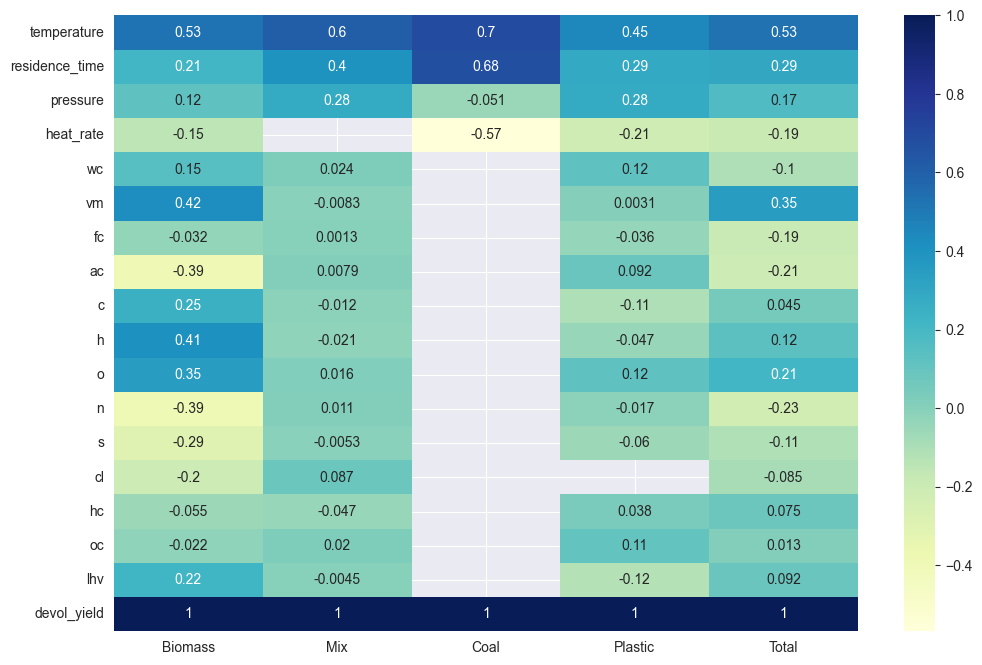

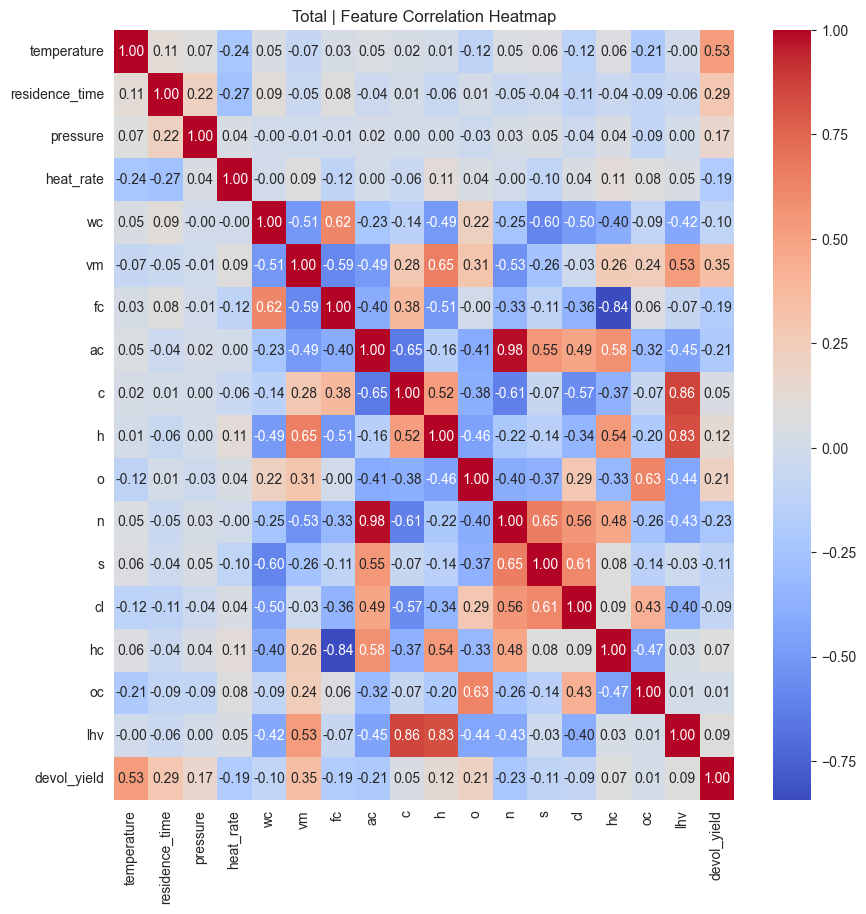

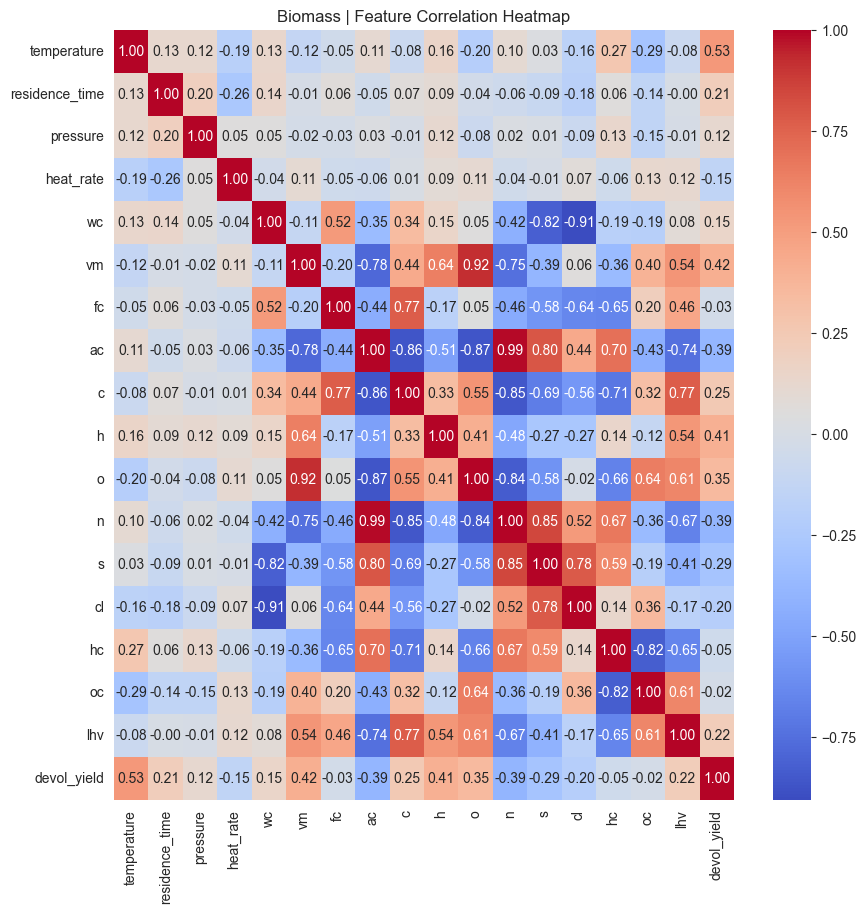

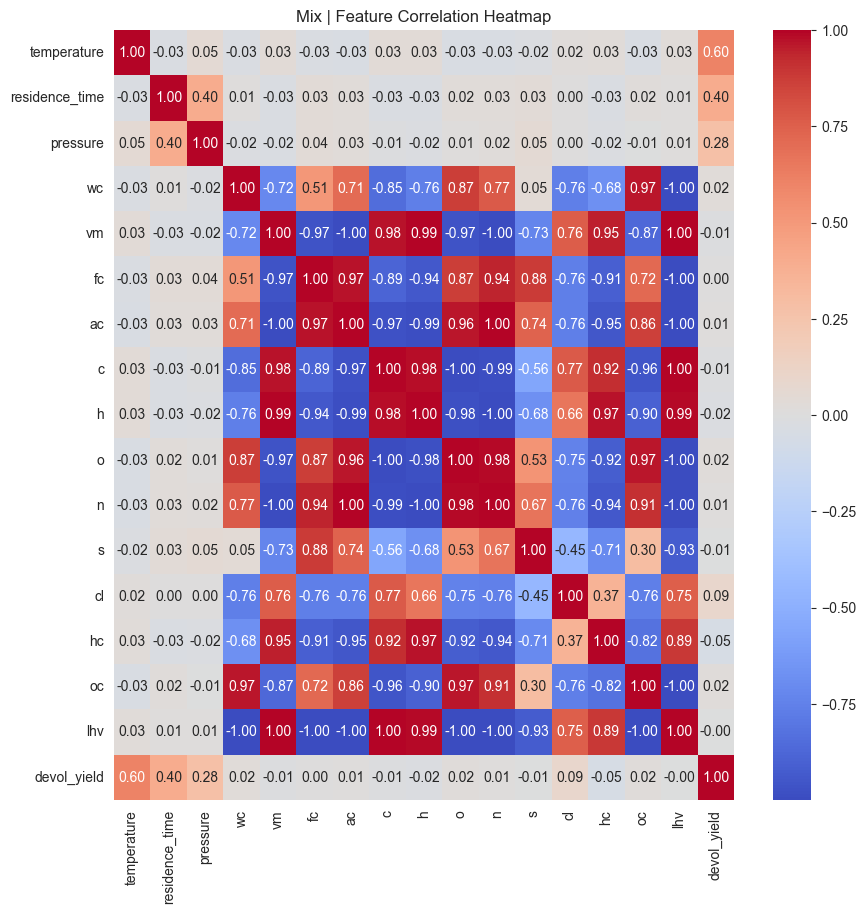

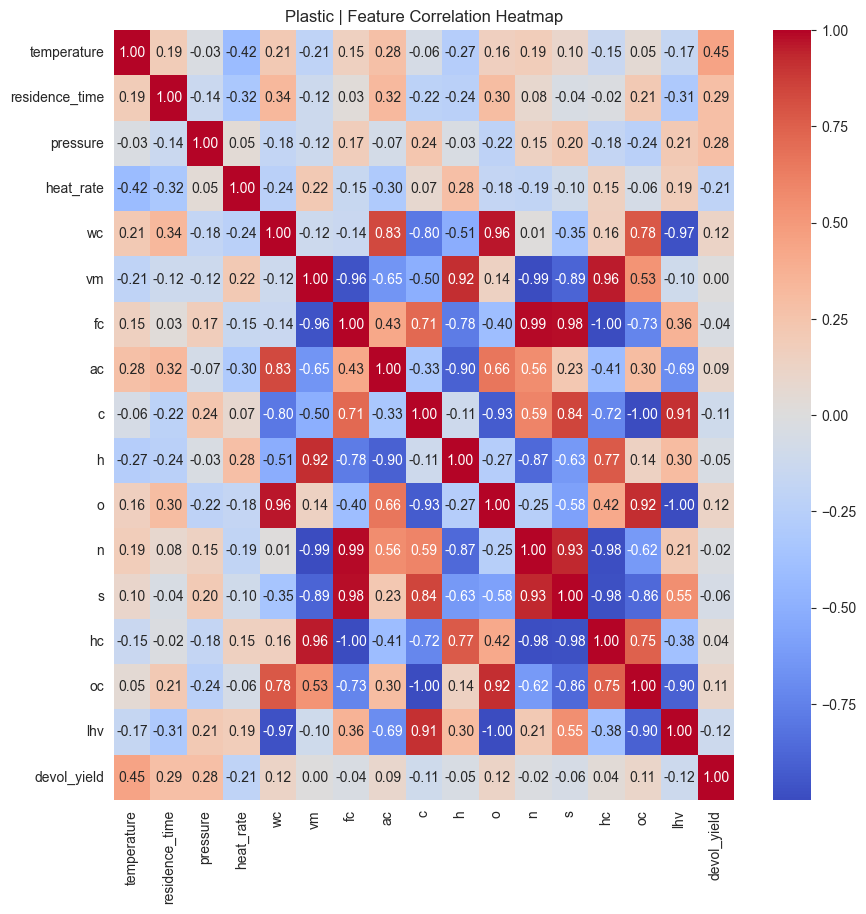

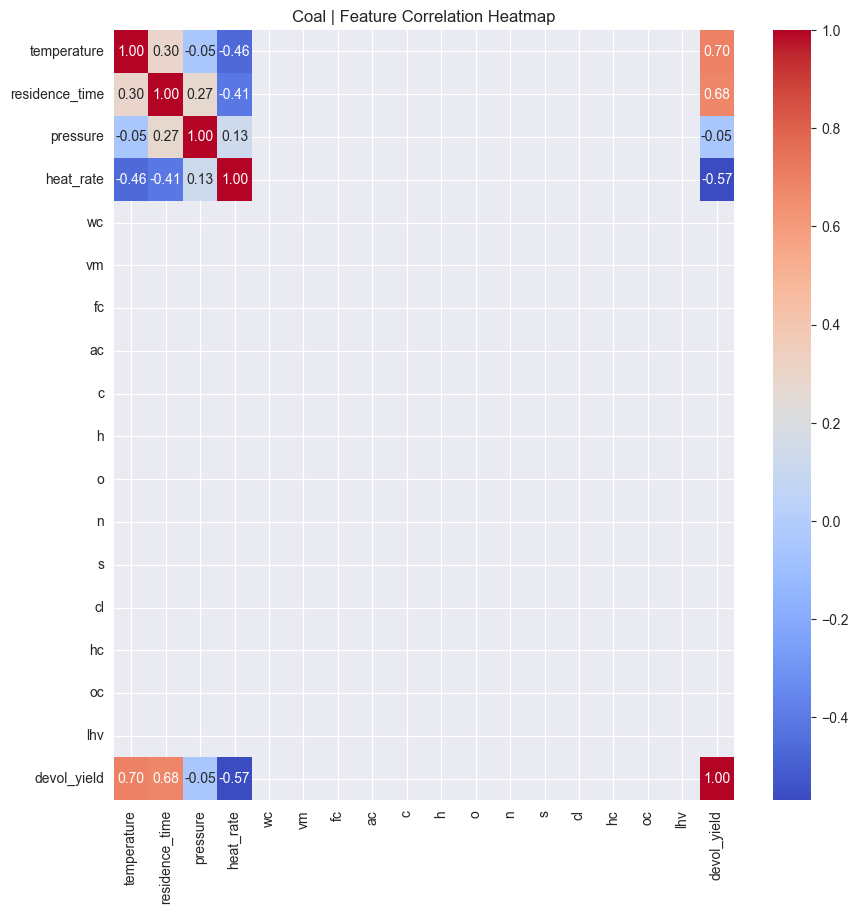

In [21]:
biomass_corr_matrix = biomass.drop('sample', axis=1).corr()
mix_corr_matrix = mix.drop(['sample', 'heat_rate'], axis=1).corr()
coal_corr_matrix = coal.drop('sample', axis=1).corr()
plastic_corr_matrix = plastic.drop(['sample', 'cl'], axis=1).corr()
total_corr_matrix = overall.drop(['sample', 'Category'], axis=1).corr()

devol_yield = pd.concat([biomass_corr_matrix.iloc[-1], mix_corr_matrix.iloc[-1], coal_corr_matrix.iloc[-1], plastic_corr_matrix.iloc[-1], total_corr_matrix.iloc[-1]],  axis = 1)

plt.figure(figsize=(12, 8))
sns.heatmap(devol_yield, annot=True, cmap='YlGnBu', xticklabels=['Biomass', 'Mix', 'Coal','Plastic', 'Total'])
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(total_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Total | Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(biomass_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Biomass | Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(mix_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mix | Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(plastic_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Plastic | Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(coal_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Coal | Feature Correlation Heatmap")
plt.show()



# Missing Value
Missing values per fuel type and feature

- Total Samples: 1990
- Biomass Samples: 976
- Mix Samples:	 563
- Plastic Samples: 256
- Coal Samples:	 195

In [22]:
missing_value = pd.concat([biomass.isnull().sum(), mix.isnull().sum(), coal.isnull().sum(), plastic.isnull().sum()] ,axis=1)
missing_value.columns = ['Biomass', 'Mix', 'Coal', 'Plastic']
print(missing_value)

                Biomass  Mix  Coal  Plastic
sample                0    0     0        0
temperature           0    0     0        0
residence_time        0    0     0        0
pressure              0    0     0        0
heat_rate             0    0     0        0
wc                    0    0     0        0
vm                    0    0     0        0
fc                    0    0     0        0
ac                    0    0     0        0
c                     0    0     0        0
h                     0    0     0        0
o                     0    0     0        0
n                     0    0     0        0
s                     0    0     0        0
cl                    0  206     0        0
hc                    0    0     0        0
oc                    0    0     0        0
lhv                   0  206     0        0
devol_yield           0    0     0        0


## k-NN Imputation

In [23]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
overall_imputed = pd.DataFrame(imputer.fit_transform(overall.drop(['sample','Category'], axis=1)), columns=overall.drop(['sample', 'Category'], axis = 1).columns)
mix_imputed = pd.DataFrame(imputer.fit_transform(mix.drop(['sample'], axis=1)))

missing_value = mix_imputed.isnull().sum()
print(missing_value)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64


# Multicollinearity Check
## Variance Inflation Factor
VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. A high VIF (>5 or 10) suggests that a variable is highly correlated with others.

Interpretation:
- VIF < 5: Low multicollinearity (good)
- VIF 5-10: Moderate correlation (acceptable but check further)
- VIF > 10: High multicollinearity (consider removing the variable)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = overall_imputed.select_dtypes(include=[np.number])  # Select only numerical columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print('\tVIF DATA FOR OVERALL SAMPLES\n------------------------------------')
print(vif_data)

	VIF DATA FOR OVERALL SAMPLES
------------------------------------
           Feature          VIF
0      temperature    31.937264
1   residence_time     3.137179
2         pressure     1.525606
3        heat_rate    17.233043
4               wc   717.758293
5               vm  4462.230402
6               fc   715.214881
7               ac  2146.453844
8                c  7176.719934
9                h  4581.078980
10               o   844.909329
11               n  6777.227678
12               s   408.872629
13              cl    38.903655
14              hc  7407.530055
15              oc   161.952834
16             lhv   500.577953
17     devol_yield    14.551078


In [25]:
df = biomass.select_dtypes(include=[np.number])  # Select only numerical columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print('\tVIF DATA FOR BIOMASS SAMPLES\n------------------------------------')
print(vif_data)

	VIF DATA FOR BIOMASS SAMPLES
------------------------------------
           Feature       VIF
0      temperature  1.877608
1   residence_time  1.186023
2         pressure  1.092059
3        heat_rate  1.166086
4               wc       inf
5               vm       inf
6               fc       inf
7               ac       inf
8                c       inf
9                h       inf
10               o       inf
11               n       inf
12               s       inf
13              cl       inf
14              hc       inf
15              oc       inf
16             lhv       inf
17     devol_yield  2.249767


C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [26]:
df = mix_imputed.select_dtypes(include=[np.number])  # Select only numerical columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print('\tVIF DATA FOR MIX SAMPLES\n------------------------------------')
print(vif_data)

	VIF DATA FOR MIX SAMPLES
------------------------------------
    Feature           VIF
0         0  1.913429e+00
1         1  1.560738e+00
2         2  1.239771e+00
3         3  0.000000e+00
4         4  2.224549e+12
5         5  5.770147e+12
6         6  1.071660e+11
7         7  7.364840e+12
8         8  1.132839e+11
9         9  4.501124e+11
10       10  1.419029e+10
11       11  3.901179e+10
12       12  9.801087e+11
13       13  4.388592e+01
14       14  5.666520e+09
15       15  3.900352e+10
16       16  4.075820e+01
17       17  2.366756e+00


C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [27]:
df = plastic.select_dtypes(include=[np.number])  # Select only numerical columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print('\tVIF DATA FOR PLASTIC SAMPLES\n------------------------------------')
print(vif_data)

	VIF DATA FOR PLASTIC SAMPLES
------------------------------------
           Feature       VIF
0      temperature  1.564479
1   residence_time  1.339827
2         pressure  1.270752
3        heat_rate  1.340845
4               wc       inf
5               vm       inf
6               fc       inf
7               ac       inf
8                c       inf
9                h       inf
10               o       inf
11               n       inf
12               s       inf
13              cl       inf
14              hc       inf
15              oc       inf
16             lhv       inf
17     devol_yield  1.601075


C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


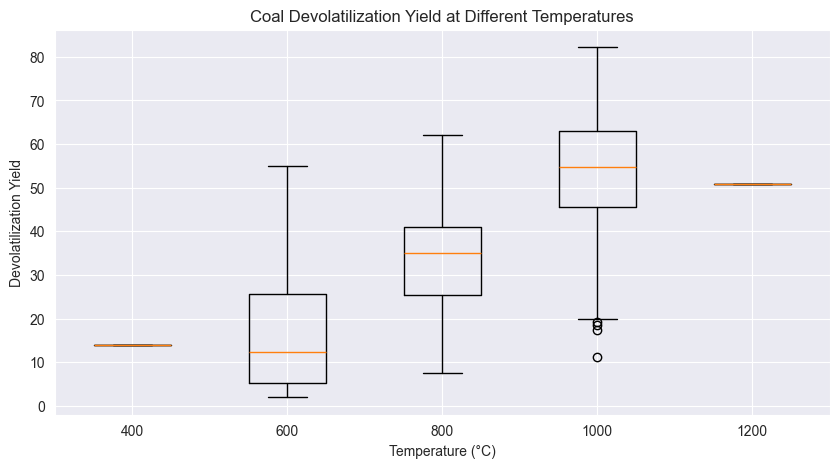

In [28]:
import matplotlib.pyplot as plt

# Extract unique temperatures
unique_temperatures = sorted(set(coal['temperature']))

# Create a list of devolatilization yield values grouped by temperature
data = [coal['devol_yield'][coal['temperature'] == temp] for temp in unique_temperatures]

plt.figure(figsize=(10, 5))

# Create the box plot
plt.boxplot(data, positions=range(1, len(unique_temperatures) + 1), widths=0.5)

# Set x-axis labels
plt.xticks(range(1, len(unique_temperatures) + 1), unique_temperatures)
plt.ylabel('Devolatilization Yield')
plt.xlabel('Temperature (°C)')
plt.title('Coal Devolatilization Yield at Different Temperatures')

plt.grid(True)
plt.show()


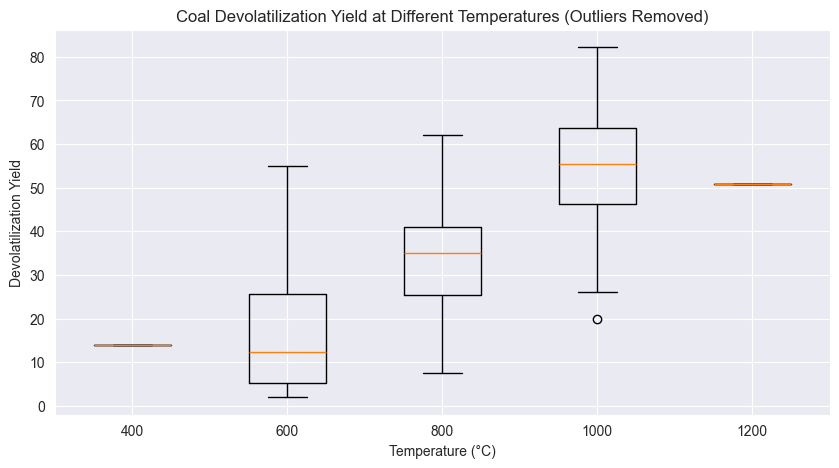

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Extract unique temperatures
unique_temperatures = sorted(set(coal['temperature']))

# Function to remove outliers using IQR
def remove_outliers(data):
    Q1 = np.percentile(data, 25)  # First quartile
    Q3 = np.percentile(data, 75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if lower_bound <= x <= upper_bound]

# Group data by temperature and remove outliers
filtered_data = [remove_outliers(coal['devol_yield'][coal['temperature'] == temp]) for temp in unique_temperatures]

plt.figure(figsize=(10, 5))

# Create the box plot
plt.boxplot(filtered_data, positions=range(1, len(unique_temperatures) + 1), widths=0.5)

# Set x-axis labels
plt.xticks(range(1, len(unique_temperatures) + 1), unique_temperatures)
plt.ylabel('Devolatilization Yield')
plt.xlabel('Temperature (°C)')
plt.title('Coal Devolatilization Yield at Different Temperatures (Outliers Removed)')

plt.grid(True)
plt.show()


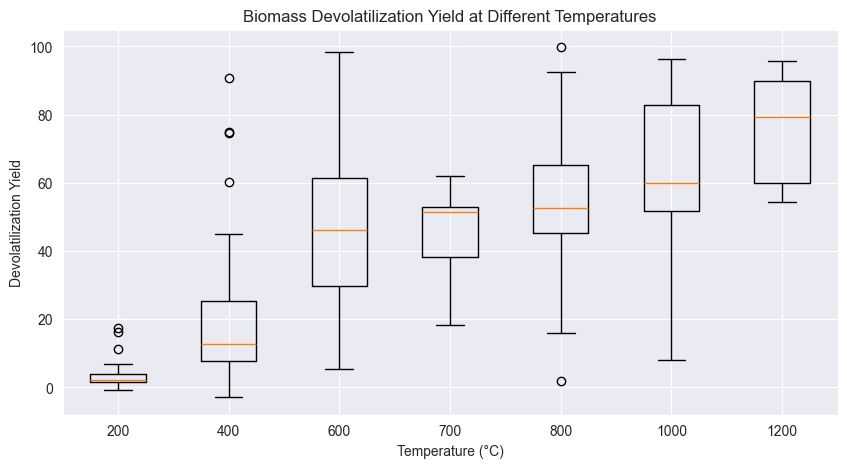

In [30]:
import matplotlib.pyplot as plt

# Extract unique temperatures
unique_temperatures = sorted(set(biomass['temperature']))

# Create a list of devolatilization yield values grouped by temperature
data = [biomass['devol_yield'][biomass['temperature'] == temp] for temp in unique_temperatures]

plt.figure(figsize=(10, 5))

# Create the box plot
plt.boxplot(data, positions=range(1, len(unique_temperatures) + 1), widths=0.5)

# Set x-axis labels
plt.xticks(range(1, len(unique_temperatures) + 1), unique_temperatures)
plt.ylabel('Devolatilization Yield')
plt.xlabel('Temperature (°C)')
plt.title('Biomass Devolatilization Yield at Different Temperatures')

plt.grid(True)
plt.show()


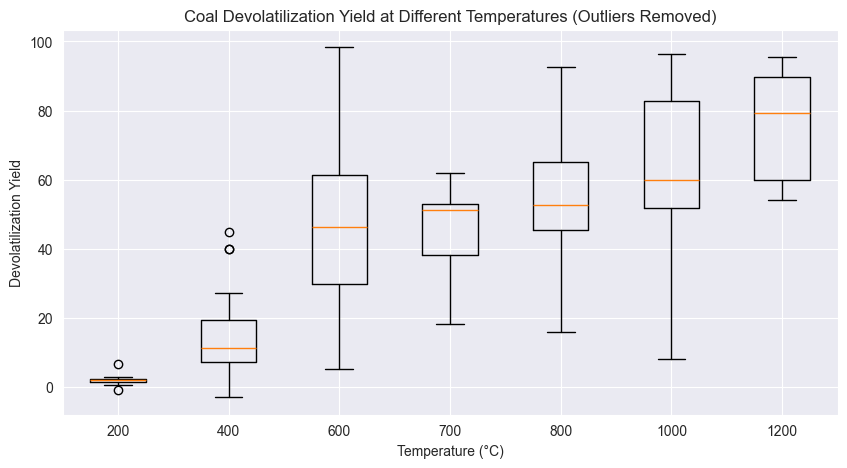

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Extract unique temperatures
unique_temperatures = sorted(set(biomass['temperature']))

# Function to remove outliers using IQR
def remove_outliers(data):
    Q1 = np.percentile(data, 25)  # First quartile
    Q3 = np.percentile(data, 75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if lower_bound <= x <= upper_bound]

# Group data by temperature and remove outliers
filtered_data = [remove_outliers(biomass['devol_yield'][biomass['temperature'] == temp]) for temp in unique_temperatures]

plt.figure(figsize=(10, 5))

# Create the box plot
plt.boxplot(filtered_data, positions=range(1, len(unique_temperatures) + 1), widths=0.5)

# Set x-axis labels
plt.xticks(range(1, len(unique_temperatures) + 1), unique_temperatures)
plt.ylabel('Devolatilization Yield')
plt.xlabel('Temperature (°C)')
plt.title('Coal Devolatilization Yield at Different Temperatures (Outliers Removed)')

plt.grid(True)
plt.show()


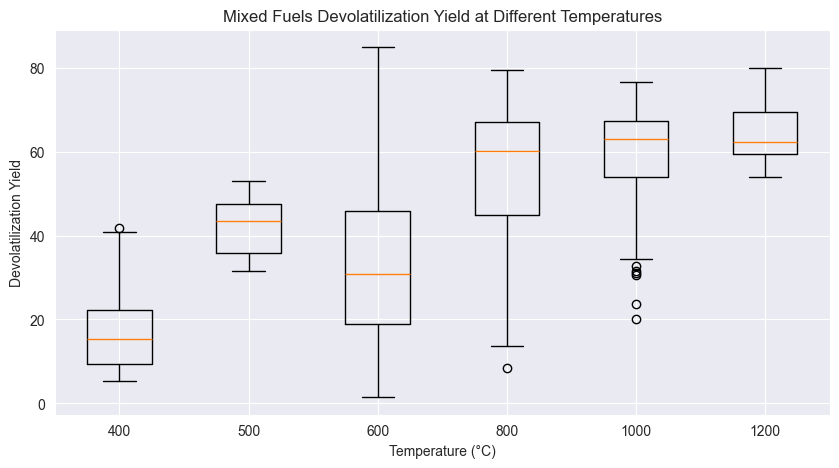

In [32]:
import matplotlib.pyplot as plt

# Extract unique temperatures
unique_temperatures = sorted(set(mix['temperature']))

# Create a list of devolatilization yield values grouped by temperature
data = [mix['devol_yield'][mix['temperature'] == temp] for temp in unique_temperatures]

plt.figure(figsize=(10, 5))

# Create the box plot
plt.boxplot(data, positions=range(1, len(unique_temperatures) + 1), widths=0.5)

# Set x-axis labels
plt.xticks(range(1, len(unique_temperatures) + 1), unique_temperatures)
plt.ylabel('Devolatilization Yield')
plt.xlabel('Temperature (°C)')
plt.title('Mixed Fuels Devolatilization Yield at Different Temperatures')

plt.grid(True)
plt.show()


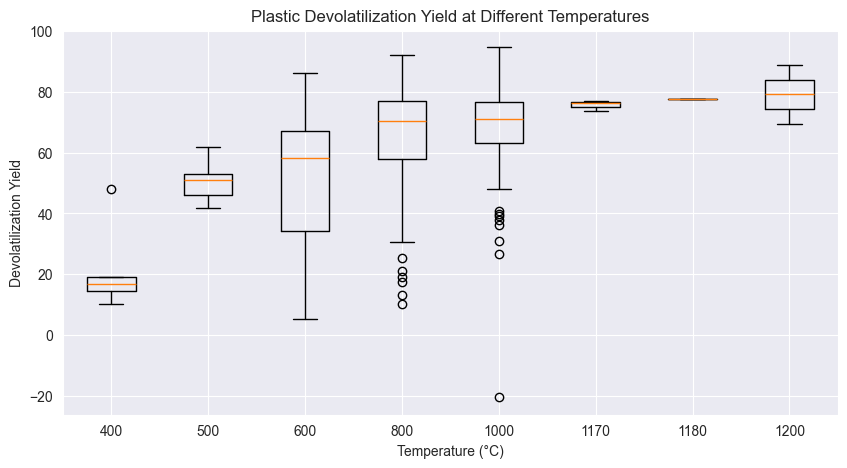

In [33]:
import matplotlib.pyplot as plt

# Extract unique temperatures
unique_temperatures = sorted(set(plastic['temperature']))

# Create a list of devolatilization yield values grouped by temperature
data = [plastic['devol_yield'][plastic['temperature'] == temp] for temp in unique_temperatures]

plt.figure(figsize=(10, 5))

# Create the box plot
plt.boxplot(data, positions=range(1, len(unique_temperatures) + 1), widths=0.5)

# Set x-axis labels
plt.xticks(range(1, len(unique_temperatures) + 1), unique_temperatures)
plt.ylabel('Devolatilization Yield')
plt.xlabel('Temperature (°C)')
plt.title('Plastic Devolatilization Yield at Different Temperatures')

plt.grid(True)
plt.show()
